<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta

import os
import re

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

from functools import reduce 
from collections import defaultdict

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_order_payments_dataset.csv',
 'groceries.csv',
 'mock_sales_data.csv',
 'online_retail_II.xlsx',
 'online_retail.xlsx',
 'ecommerce-data.csv',
 '1_customers_dataset.csv',
 'sample-sales-data.csv',
 'sales_data_with_stores.csv',
 '1_orders_dataset.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sales.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [3]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns = [re.sub(' ', '_', re.sub(' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


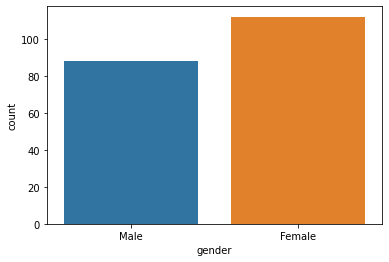

In [5]:
sns.countplot(data = df, x = 'gender')

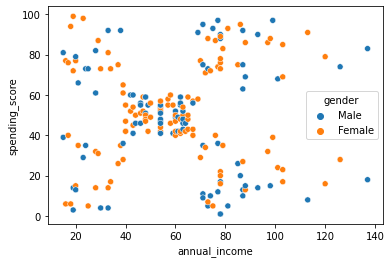

In [7]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

In [10]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df[['annual_income', 'spending_score']])
km = KMeans(n_clusters = 5, random_state = 10)
km.fit(df_std)
df['flag'] = km.fit_predict(df_std).astype(str)
df.head()

,customerid,gender,age,annual_income,spending_score,flag
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


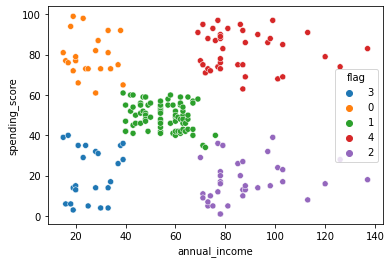

In [11]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'flag')

# Iterator

In [18]:
from string import ascii_lowercase as letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9]

In [53]:
names = ['park', 'kim', 'you', 'ki', 'so']
email1 = [''.join(np.random.choice(list(letters) + list(range(10)), 10, replace = True)) for a in range(5)]
email2 = [''.join(np.random.choice(list(letters) + list(range(5)), 5, replace = True)) for a in range(5)]
email3 = np.random.choice(['.com', '.io', '.net'], 5, replace = True)
email = [a + '@' + b for a, b in zip(email1, email2)]
email = [a + b for a, b in zip(email, email3)]
age = np.random.randint(20, 40, 5)

In [55]:
info = [{'names' : names}, {'emails' : email}, {'age': age}]
info

[{'names': ['park', 'kim', 'you', 'ki', 'so']},
 {'emails': ['cflz4rnfzc@1czwx.net',
   'zcvcm8cb2b@mwuxr.net',
   '6cemj791ar@icvh4.io',
   '2wsc2hyjdq@rkyrn.com',
   'fxkn4068sj@hz4a2.net']},
 {'age': array([35, 39, 37, 27, 29])}]